In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy

from scipy import stats

# Homework 2

## Problem 1

Rolling sevens is more probable.

1/36 is the probability of two ones.
6/36 is the probability of rolling seven.

## Problem 2

In [2]:
dice1 = [1/6]*6

In [3]:
probs = np.convolve(dice1, dice1)

In [4]:
print(6.0*(1/6)**2.0)
print(5.0*(1/6)**2.0)
print(4.0*(1/6)**2.0)
print(3.0*(1/6)**2.0)
print(2.0*(1/6)**2.0)
print(1.0*(1/6)**2.0)

0.16666666666666666
0.1388888888888889
0.1111111111111111
0.08333333333333333
0.05555555555555555
0.027777777777777776


This corresponds to our probabilities in our convolution, based on where they overlap. Of course, the convolution is symmetric but this is how to calculate these values.

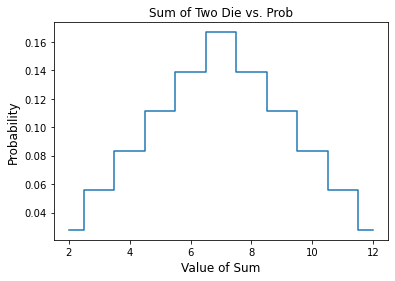

In [5]:
domain = np.linspace(2, 12, 11)

plt.title(f'Sum of Two Die vs. Prob', fontsize='large')
plt.xlabel('Value of Sum',fontsize='large')
plt.ylabel('Probability',fontsize='large')
#plt.vlines(domain, 0, probs)
plt.step(domain, probs, where = 'mid')

# Problem 3

In [6]:
mean = 0
for a in range(len(domain)):
    mean += probs[a] * domain[a]
    
print(str(mean) + ' is the mean of our distribution.')

7.0 is the mean of our distribution.


In [7]:
var = 0
for a in range(len(domain)):
    var += probs[a]*(domain[a]-mean)**2

print(str(var) + ' is the variance of our distribution.')

5.833333333333334 is the variance of our distribution.


This result makes sense.

# Problem 4

In [8]:
for a in range(8):
    probs = np.convolve(probs, dice1)
    
print(probs)

[1.65381717e-08 1.65381717e-07 9.09599443e-07 3.63839777e-06
 1.18247928e-05 3.31094197e-05 8.26081676e-05 1.87542867e-04
 3.92946959e-04 7.67701930e-04 1.40951530e-03 2.44665712e-03
 4.03407353e-03 6.34189270e-03 9.53533096e-03 1.37465945e-02
 1.90415547e-02 2.53867551e-02 3.26236936e-02 4.04573294e-02
 4.84643679e-02 5.61241048e-02 6.28704385e-02 6.81581055e-02
 7.15327194e-02 7.26928060e-02 7.15327194e-02 6.81581055e-02
 6.28704385e-02 5.61241048e-02 4.84643679e-02 4.04573294e-02
 3.26236936e-02 2.53867551e-02 1.90415547e-02 1.37465945e-02
 9.53533096e-03 6.34189270e-03 4.03407353e-03 2.44665712e-03
 1.40951530e-03 7.67701930e-04 3.92946959e-04 1.87542867e-04
 8.26081676e-05 3.31094197e-05 1.18247928e-05 3.63839777e-06
 9.09599443e-07 1.65381717e-07 1.65381717e-08]


In [9]:
domain2 = np.linspace(10, 60, 51)

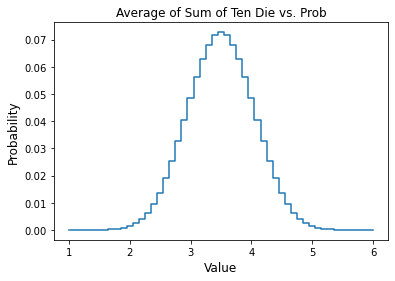

In [10]:
plt.title(f'Average of Sum of Ten Die vs. Prob', fontsize='large')
plt.xlabel('Value',fontsize='large')
plt.ylabel('Probability',fontsize='large')
#plt.vlines(35, 0, 1.05 * max(probs), linestyles = 'dashed', colors = '#ff9dde', label = 'Mean')
plt.step(domain2/10, probs, where = 'mid')

The mean is 35.

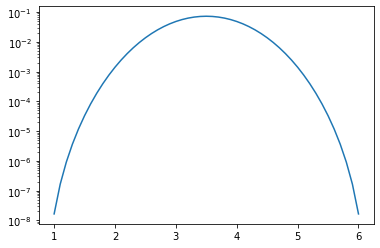

In [11]:
plt.semilogy(domain2/10, probs)

By checking on a semi-log plot, we can say with reasonable confidence that we have a Gaussian distribution. This is due to the shape of the curve, which closely resembles a quadratic function.

# Problem 5

Here we will generate a random Gaussian curve and plot it. Then we shall demonstrate a few properties.

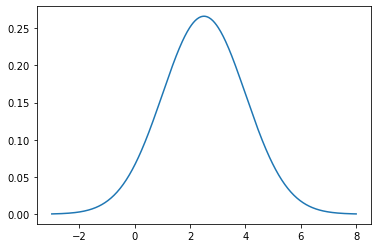

In [12]:
x = np.linspace(-3,8,500)
normalDist = stats.norm.pdf(x, loc=2.5, scale=1.5)
plt.plot(x,normalDist)
plt.show()

In the code, we have defined our initial Gaussian curve with a mean of 2.5, and a standard deviation of 1.5.

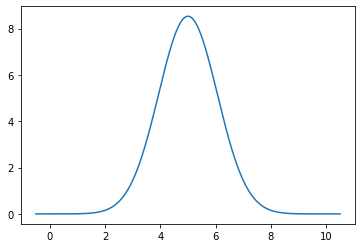

In [13]:
normalDistSum = np.convolve(normalDist, normalDist)

domain3 = np.linspace(-0.5, 10.5, 999)
plt.plot(domain3, normalDistSum)

Here is the sum of an initial Gaussian curve, which is the definition of the convolution with itself.

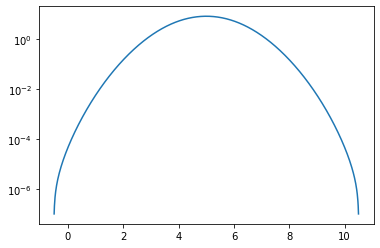

In [14]:
plt.semilogy(domain3, normalDistSum)

By plotting it in a semilog plot, we see a curve resembling an quadratic, where we can reasonably say the sum of an initially Gaussian distribution is also a Gaussian.

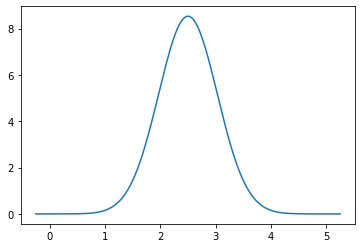

In [15]:
plt.plot(domain3/2, normalDistSum)

Here, by restricting the domain of values by averaging it out by the number of convolutions we have done, we plot the average of the initial Gaussian.

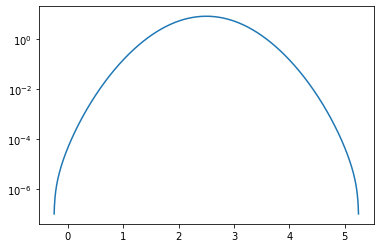

In [16]:
plt.semilogy(domain3/2, normalDistSum)

Again, we check to see that the average is also a Gaussian by plotting on a semilog y axis. Predictably, we see the quadratic shape. If the sum is a Gaussian, we can also expect that averaging it out will maintain the Gaussian shape.

The standard deviation of the resulting sum/average changes in a predictable way. Given the key point that we are summing two random, independent variables, we know that the mean of the sum is the sum of the two means. Likewise, the variance of the sum is the sum of the two variances. Given that I chose our original standard deviation to be 1.5, our new standard deviation must be $\sigma = \sqrt{(1.5)^2 + (1.5)^2} = \sqrt{4.5} \approx 2.121$.

The consequence of this property is that, when integrating a signal over time involving multiple independent, random, Gaussian variables, the spread of the overall Gaussian will continue to increase. So your corresponding sigma value and interval of significance will continue to rise.